In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Load the Dataset

In [3]:
df = pd.read_csv('application_data (2).csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

## Determine the Shape of the Dataset

In [5]:
df.shape

(307511, 122)

## Cleaning the Missing Data

### We will start by cleaning the columns or dropping the columns having more than 10 percent of missing values.

### For Columns

In [11]:
empty_col = df.isnull().sum()
empty_col = empty_col.loc[empty_col.values>df.shape[0]*0.1]
df.drop(columns=empty_col.index,inplace=True)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                0                0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  

[5 rows x 65 columns]

## For Rows

In [13]:
df.dropna(thresh=df.shape[1] - df.shape[1]*0.1,inplace=True)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                0                0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0  

[5 rows x 65 columns]

### Recheck For Missing Values and Fill Columns with Reasonable Values 

In [23]:
empty_col = df.isnull().sum()
empty_col.loc[empty_col.values>0]


AMT_ANNUITY                   12
AMT_GOODS_PRICE              278
NAME_TYPE_SUITE             1292
CNT_FAM_MEMBERS                2
EXT_SOURCE_2                 660
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

In [25]:
#AMT_ANNUITY is column that describe the monthly payment of the loan, let's fill this column with 
#the median of the column.

### Removing all Columns Starting with Flag As they are not Important For Our analysis

In [27]:

unwanted_col = []
for col in df.columns:
    if(col.startswith('FLAG')):
        unwanted_col.append(col)

df.drop(columns=unwanted_col,inplace=True)
df


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0           100002       1         Cash loans           M             0   
1           100003       0         Cash loans           F             0   
2           100004       0    Revolving loans           M             0   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307506      456251       0         Cash loans           M             0   
307507      456252       0         Cash loans           F             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   
307510      456255       0         Cash loans           F             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

       NAME_TYPE_SUITE  ... REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0        Unaccompanied  ...                      0                      0   
1               Family  ...                      0                      0   
2        Unaccompanied  ...                      0                      0   
3        Unaccompanied  ...                      0                      0   
4        Unaccompanied  ...                      0                      1   
...                ...  ...                    ...                    ...   
307506   Unaccompanied  ...                      0                      0   
307507   Unaccompanied  ...                      0                      0   
307508   Unaccompanied  ...                      0                      1   
307509   Unaccompanied  ...                      1                      1   
307510   Unaccompanied  ...                      0                      1   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                            0  Business Entity Type 3      0.262949   
1                            0                  School      0.622246   
2                            0              Government      0.555912   
3                            0  Business Entity Type 3      0.650442   
4                            1                Religion      0.322738   
...                        ...                     ...           ...   
307506                       0                Services      0.681632   
307507                       0                     XNA      0.115992   
307508                       1                  School      0.535722   
307509                       0  Business Entity Type 1      0.514163   
307510                       1  Business Entity Type 3      0.708569   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            1.0                       0.0   
2                            0.0                       0.0   
3                            2.0                       0.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0          

### Dealing With Categorical Column Having 'XNA' Values

### Gender Column : 

In [29]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

### Organization Column: 

In [31]:
df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

### Now that XNA has 55374 values , we do not want to deal with them, it is better to ignore them as of now.

In [35]:
df = df.loc[df['ORGANIZATION_TYPE']!='XNA']


### Outliers In Applicant's Income:

In [37]:
q1,q2,q3 = np.percentile(df['AMT_INCOME_TOTAL'],[25,50,75])
iqr = q3-q1
lower_extreme = q1-iqr*1.5
upper_extreme = q1+iqr+1.5
df = df.loc[df['AMT_INCOME_TOTAL']<upper_extreme]
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0           100002       1         Cash loans           M             0   
2           100004       0    Revolving loans           M             0   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
5           100008       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307504      456248       0         Cash loans           F             0   
307506      456251       0         Cash loans           M             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   
307510      456255       0         Cash loans           F             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
5                99000.0    490495.5      27517.5         454500.0   
...                  ...         ...          ...              ...   
307504          153000.0    331920.0      16096.5         225000.0   
307506          157500.0    254700.0      27558.0         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        NAME_TYPE_SUITE  ... REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0         Unaccompanied  ...                      0                      0   
2         Unaccompanied  ...                      0                      0   
3         Unaccompanied  ...                      0                      0   
4         Unaccompanied  ...                      0                      1   
5       Spouse, partner  ...                      0                      0   
...                 ...  ...                    ...                    ...   
307504    Unaccompanied  ...                      0                      0   
307506    Unaccompanied  ...                      0                      0   
307508    Unaccompanied  ...                      0                      1   
307509    Unaccompanied  ...                      1                      1   
307510    Unaccompanied  ...                      0                      1   

       LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                            0  Business Entity Type 3      0.262949   
2                            0              Government      0.555912   
3                            0  Business Entity Type 3      0.650442   
4                            1                Religion      0.322738   
5                            0                   Other      0.354225   
...                        ...                     ...           ...   
307504                       0           Self-employed      0.530725   
307506                       0                Services      0.681632   
307508                       1                  School      0.535722   
307509                       0  Business Entity Type 1      0.514163   
307510                       1  Business Entity Type 3      0.708569   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
2                            0.0                       0.0   
3                            2.0                       0.0   
4                            0.0                       0.0   
5                            0.0                       0.0   
...                          ...                       ...   
307504                       0

### Creating Bins For Income Amount (Amount Range)

In [39]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0           100002       1         Cash loans           M             0   
2           100004       0    Revolving loans           M             0   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
5           100008       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307504      456248       0         Cash loans           F             0   
307506      456251       0         Cash loans           M             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   
307510      456255       0         Cash loans           F             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
5                99000.0    490495.5      27517.5         454500.0   
...                  ...         ...          ...              ...   
307504          153000.0    331920.0      16096.5         225000.0   
307506          157500.0    254700.0      27558.0         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        NAME_TYPE_SUITE  ... REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
0         Unaccompanied  ...                      0                       0   
2         Unaccompanied  ...                      0                       0   
3         Unaccompanied  ...                      0                       0   
4         Unaccompanied  ...                      1                       1   
5       Spouse, partner  ...                      0                       0   
...                 ...  ...                    ...                     ...   
307504    Unaccompanied  ...                      0                       0   
307506    Unaccompanied  ...                      0                       0   
307508    Unaccompanied  ...                      1                       1   
307509    Unaccompanied  ...                      1                       0   
307510    Unaccompanied  ...                      1                       1   

             ORGANIZATION_TYPE EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0       Business Entity Type 3     0.262949                       2.0   
2                   Government     0.555912                       0.0   
3       Business Entity Type 3     0.650442                       2.0   
4                     Religion     0.322738                       0.0   
5                        Other     0.354225                       0.0   
...                        ...          ...                       ...   
307504           Self-employed     0.530725                       0.0   
307506                Services     0.681632                       0.0   
307508                  School     0.535722                       6.0   
307509  Business Entity Type 1     0.514163                       0.0   
307510  Business Entity Type 3     0.708569                       0.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
2                            0.0                       0.0   
3                            0.0                       2.0   
4                            0.0                       0.0   
5                            0.0                       0.0   
...                          ...                       ...   
307504

### Creating Bins For Credit Amount:

In [43]:

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0           100002       1         Cash loans           M             0   
2           100004       0    Revolving loans           M             0   
3           100006       0         Cash loans           F             0   
4           100007       0         Cash loans           M             0   
5           100008       0         Cash loans           M             0   
...            ...     ...                ...         ...           ...   
307504      456248       0         Cash loans           F             0   
307506      456251       0         Cash loans           M             0   
307508      456253       0         Cash loans           F             0   
307509      456254       1         Cash loans           F             0   
307510      456255       0         Cash loans           F             0   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
5                99000.0    490495.5      27517.5         454500.0   
...                  ...         ...          ...              ...   
307504          153000.0    331920.0      16096.5         225000.0   
307506          157500.0    254700.0      27558.0         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        NAME_TYPE_SUITE  ... LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0         Unaccompanied  ...                       0  Business Entity Type 3   
2         Unaccompanied  ...                       0              Government   
3         Unaccompanied  ...                       0  Business Entity Type 3   
4         Unaccompanied  ...                       1                Religion   
5       Spouse, partner  ...                       0                   Other   
...                 ...  ...                     ...                     ...   
307504    Unaccompanied  ...                       0           Self-employed   
307506    Unaccompanied  ...                       0                Services   
307508    Unaccompanied  ...                       1                  School   
307509    Unaccompanied  ...                       0  Business Entity Type 1   
307510    Unaccompanied  ...                       1  Business Entity Type 3   

       EXT_SOURCE_2 OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0          0.262949                      2.0                       2.0   
2          0.555912                      0.0                       0.0   
3          0.650442                      2.0                       0.0   
4          0.322738                      0.0                       0.0   
5          0.354225                      0.0                       0.0   
...             ...                      ...                       ...   
307504     0.530725                      0.0                       0.0   
307506     0.681632                      0.0                       0.0   
307508     0.535722                      6.0                       0.0   
307509     0.514163                      0.0                       0.0   
307510     0.708569                      0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
2                            0.0                       0.0   
3                            2.0                       0.0   
4                            0.0                       0.0   
5                            0.0                       0.0   
...                          ...            

### Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

In [47]:
df0=df.loc[df["TARGET"]==0]
df1=df.loc[df["TARGET"]==1]

### Distribution Of Income Range

C:\Users\prasa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\prasa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


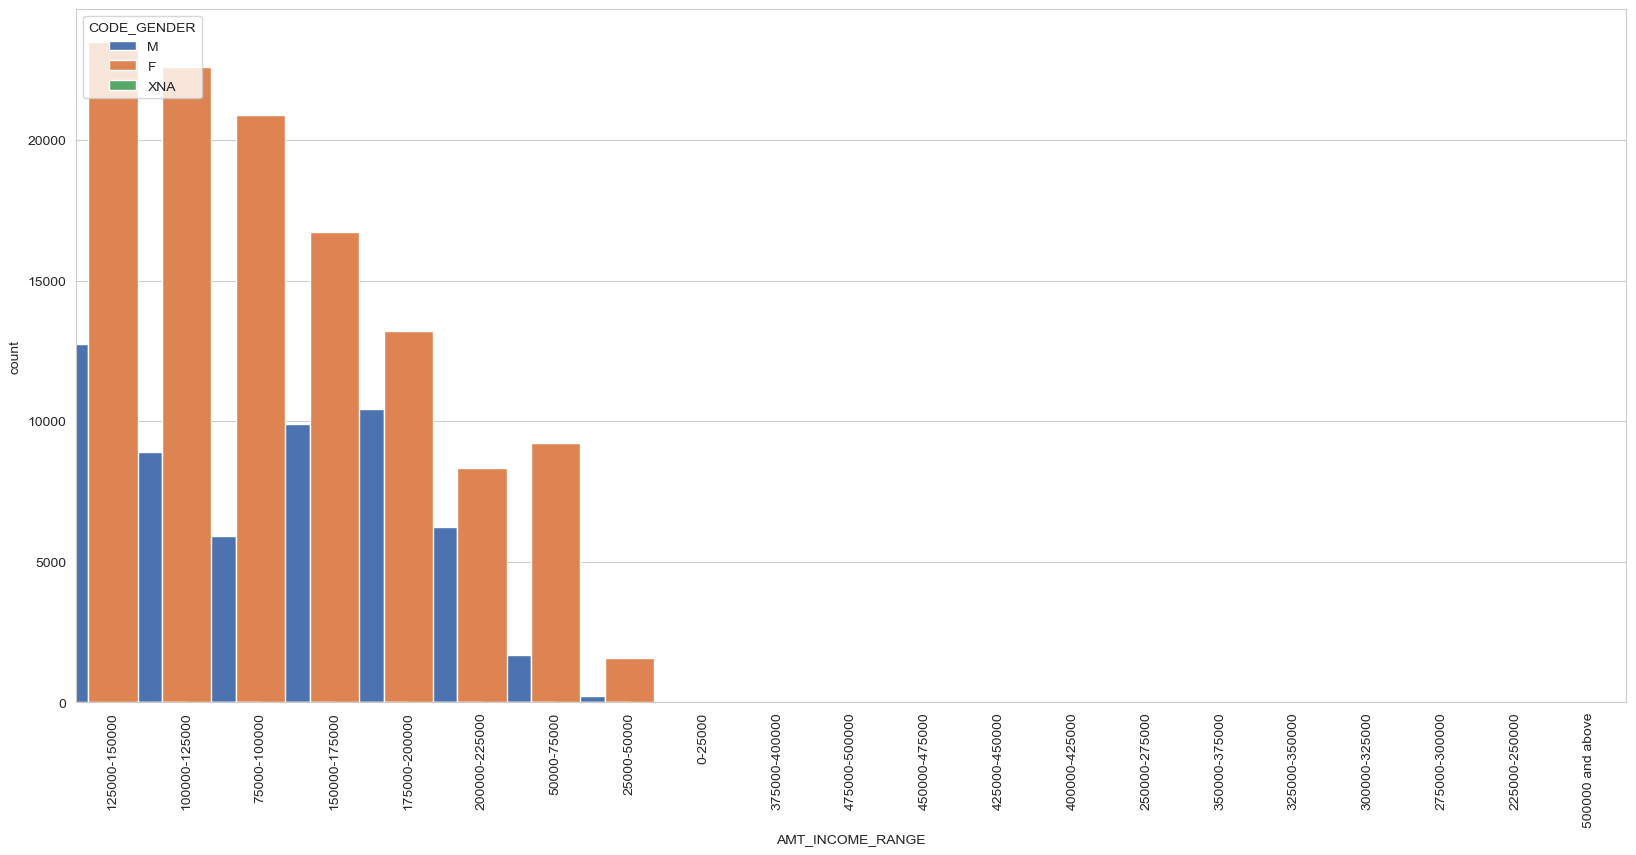

In [63]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.countplot(data=df0,x='AMT_INCOME_RANGE',width=2,palette='deep',hue='CODE_GENDER',saturation=1,order=df['AMT_INCOME_RANGE'].value_counts().index)
plt.xticks(rotation=90)
fig.set_size_inches(20 ,9)
plt.show()

### Distribution Of Credit Range

C:\Users\prasa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\prasa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


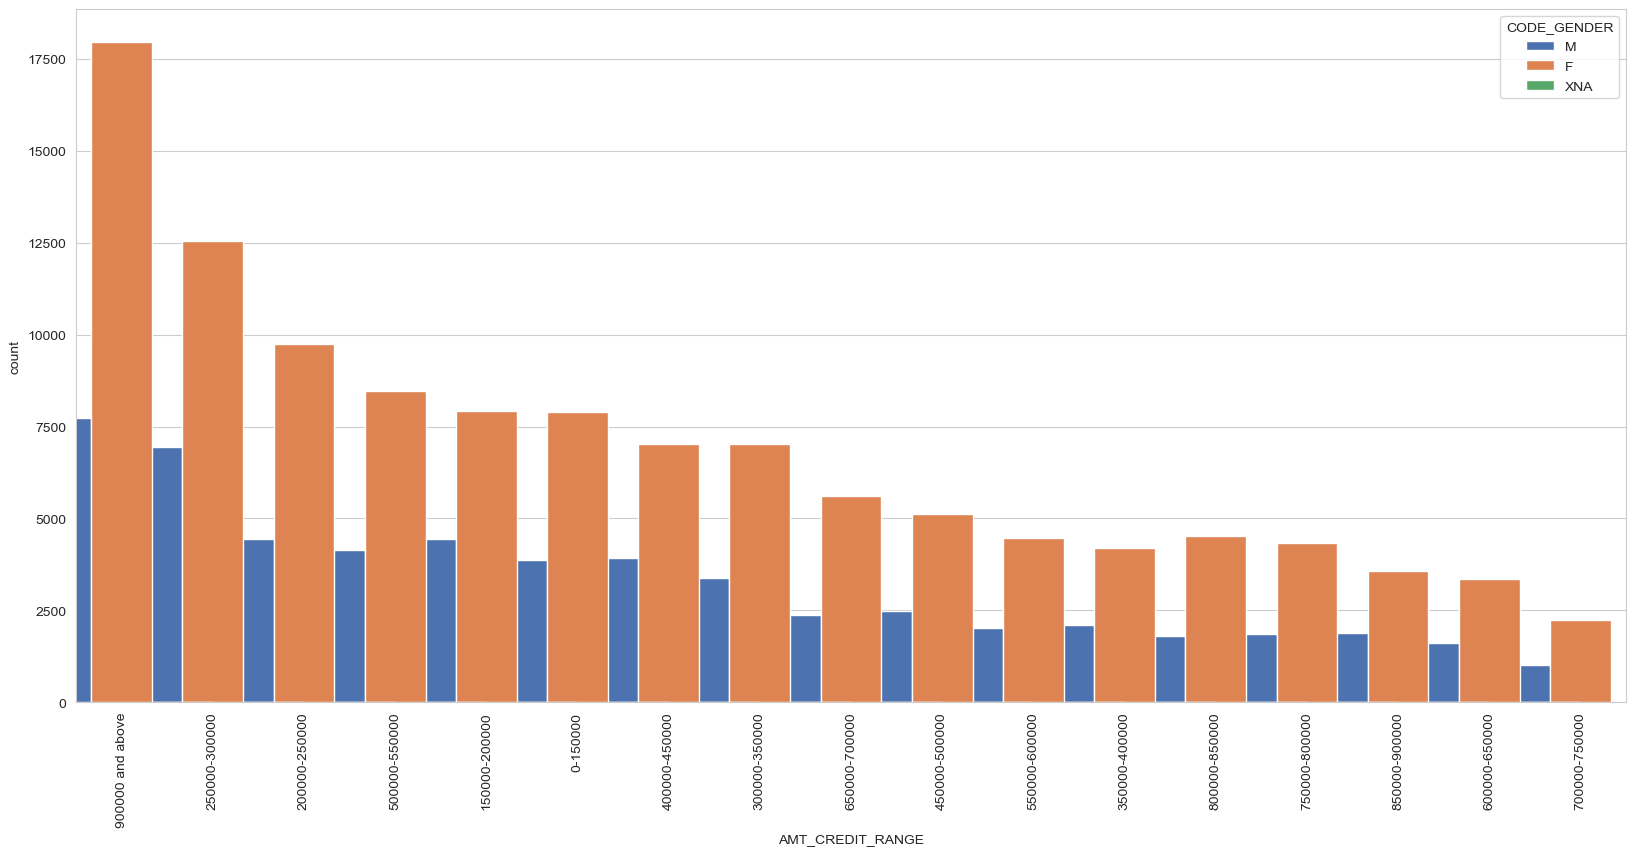

In [69]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.countplot(data=df0,x='AMT_CREDIT_RANGE',width=2,palette='deep',hue='CODE_GENDER',saturation=1,order=df['AMT_CREDIT_RANGE'].value_counts().index)
plt.xticks(rotation=90)
fig.set_size_inches(20 ,9)
plt.show()

### Distribution Of Contract Type

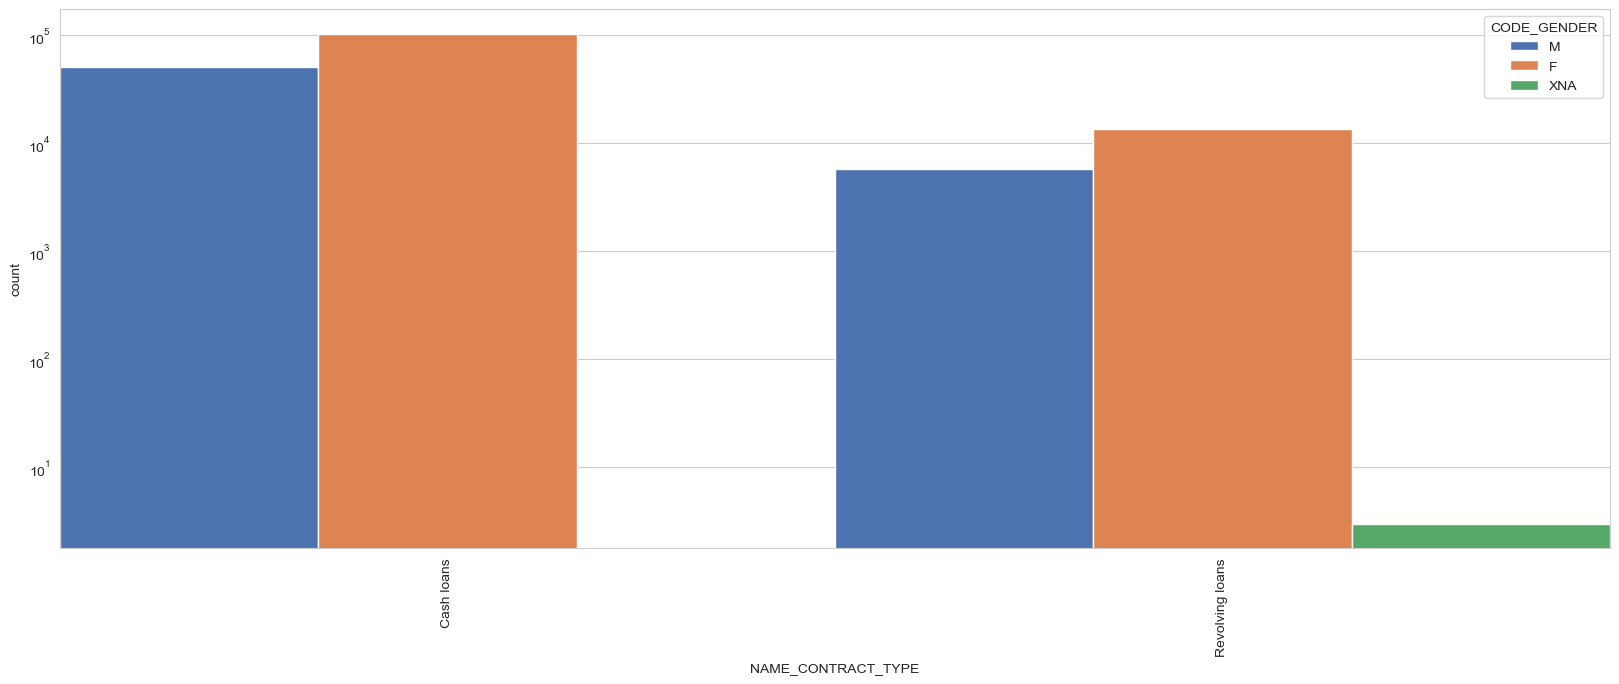

In [77]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.countplot(data=df0,x='NAME_CONTRACT_TYPE',width=1,palette='deep',hue='CODE_GENDER',saturation=1,order=df['NAME_CONTRACT_TYPE'].value_counts().index)
plt.xticks(rotation=90)
fig.set_size_inches(20 ,7)
plt.yscale('log')
plt.show()

### Distribution Of Organization Type 


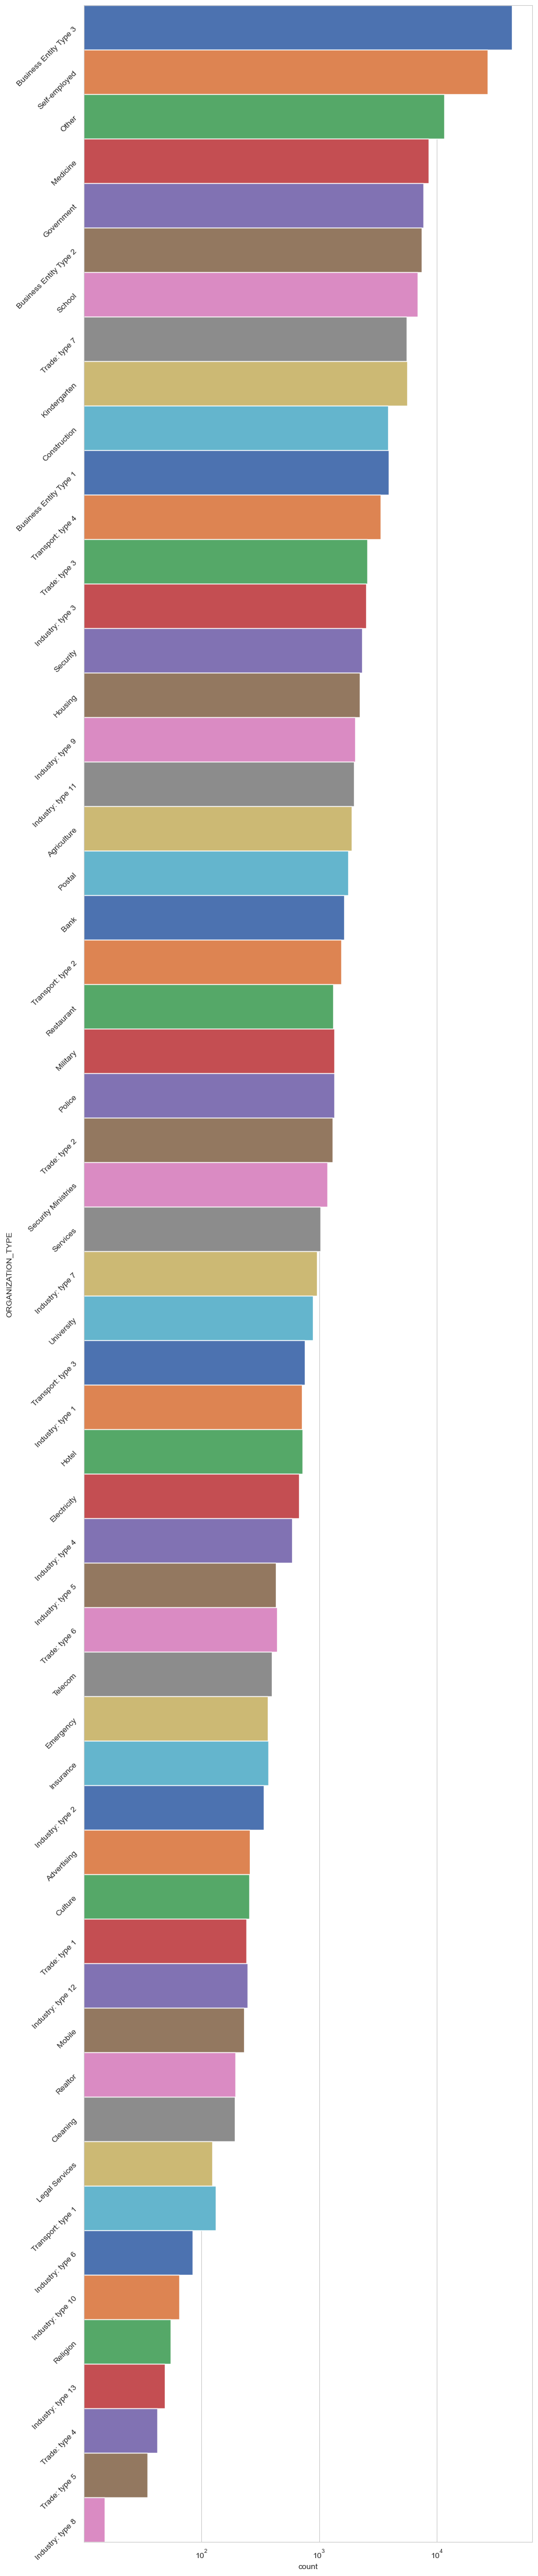

In [79]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.countplot(data=df0,y='ORGANIZATION_TYPE',width=1,palette='deep',saturation=1,order=df['ORGANIZATION_TYPE'].value_counts().index)
fig.set_size_inches(10,len(df['ORGANIZATION_TYPE'].unique()))
plt.yticks(rotation=45)
plt.xscale('log')
plt.show()

C:\Users\prasa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\prasa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


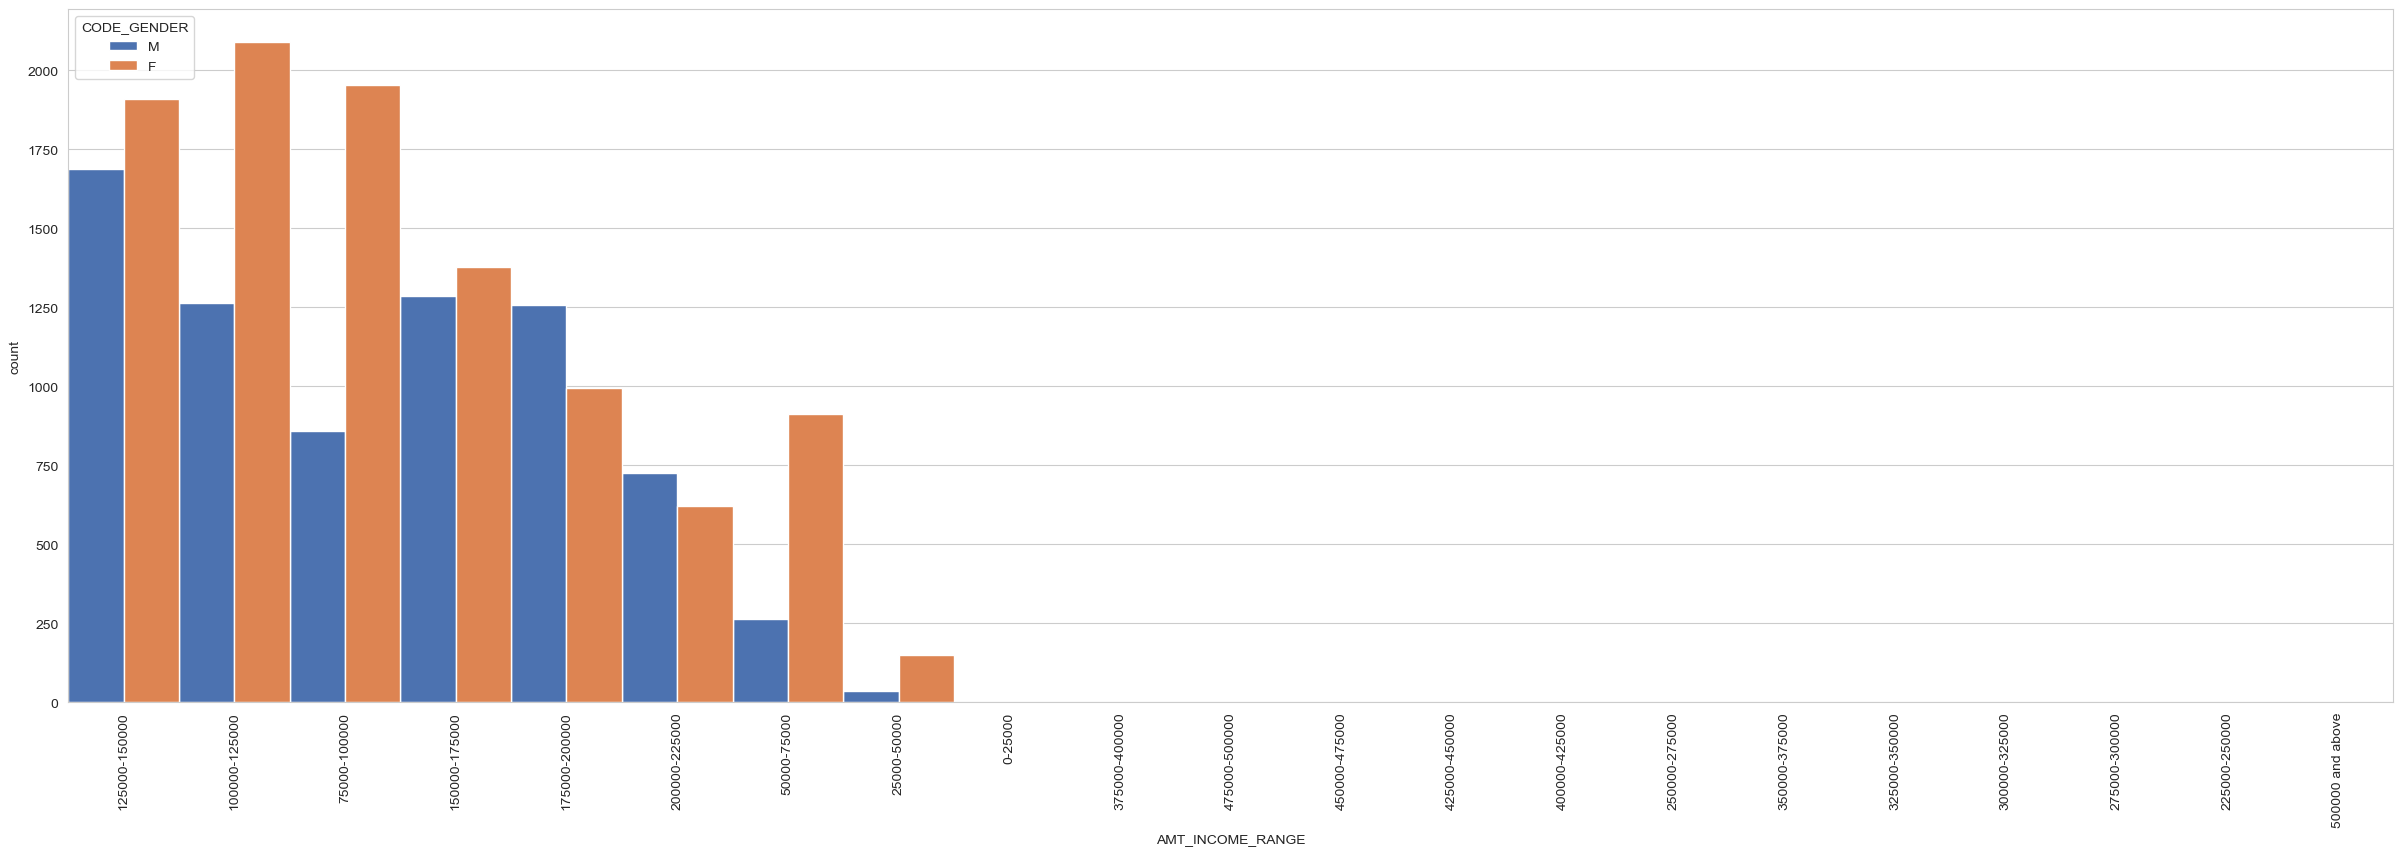

In [87]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.countplot(data=df1,x='AMT_INCOME_RANGE',width=1,palette='deep',hue='CODE_GENDER',saturation=1,order=df['AMT_INCOME_RANGE'].value_counts().index)
plt.xticks(rotation=90)
fig.set_size_inches(30 ,9)
plt.show()

C:\Users\prasa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\prasa\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


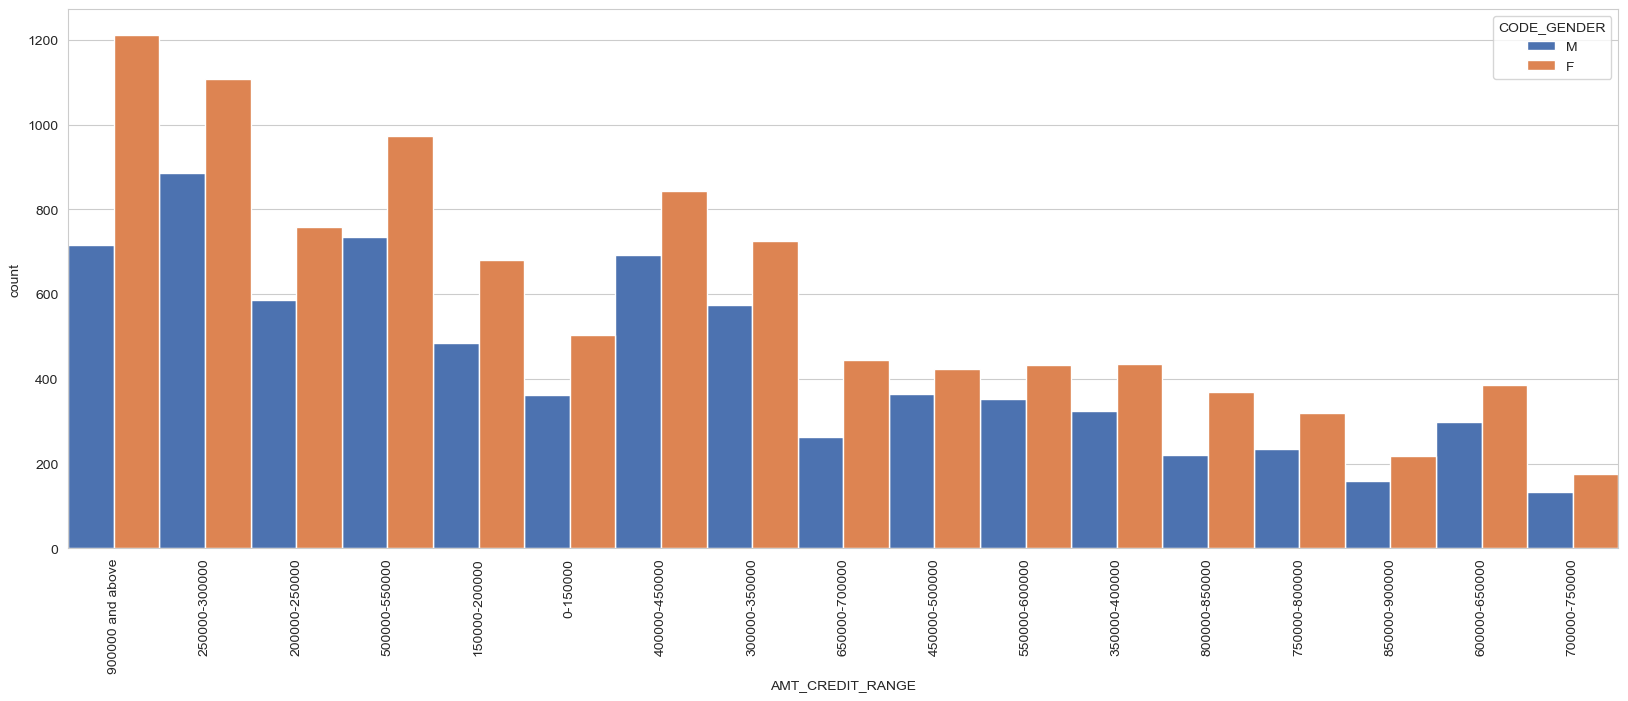

In [89]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.countplot(data=df1,x='AMT_CREDIT_RANGE',width=1,palette='deep',hue='CODE_GENDER',saturation=1,order=df['AMT_CREDIT_RANGE'].value_counts().index)
plt.xticks(rotation=90)
fig.set_size_inches(20 ,7)
plt.show()

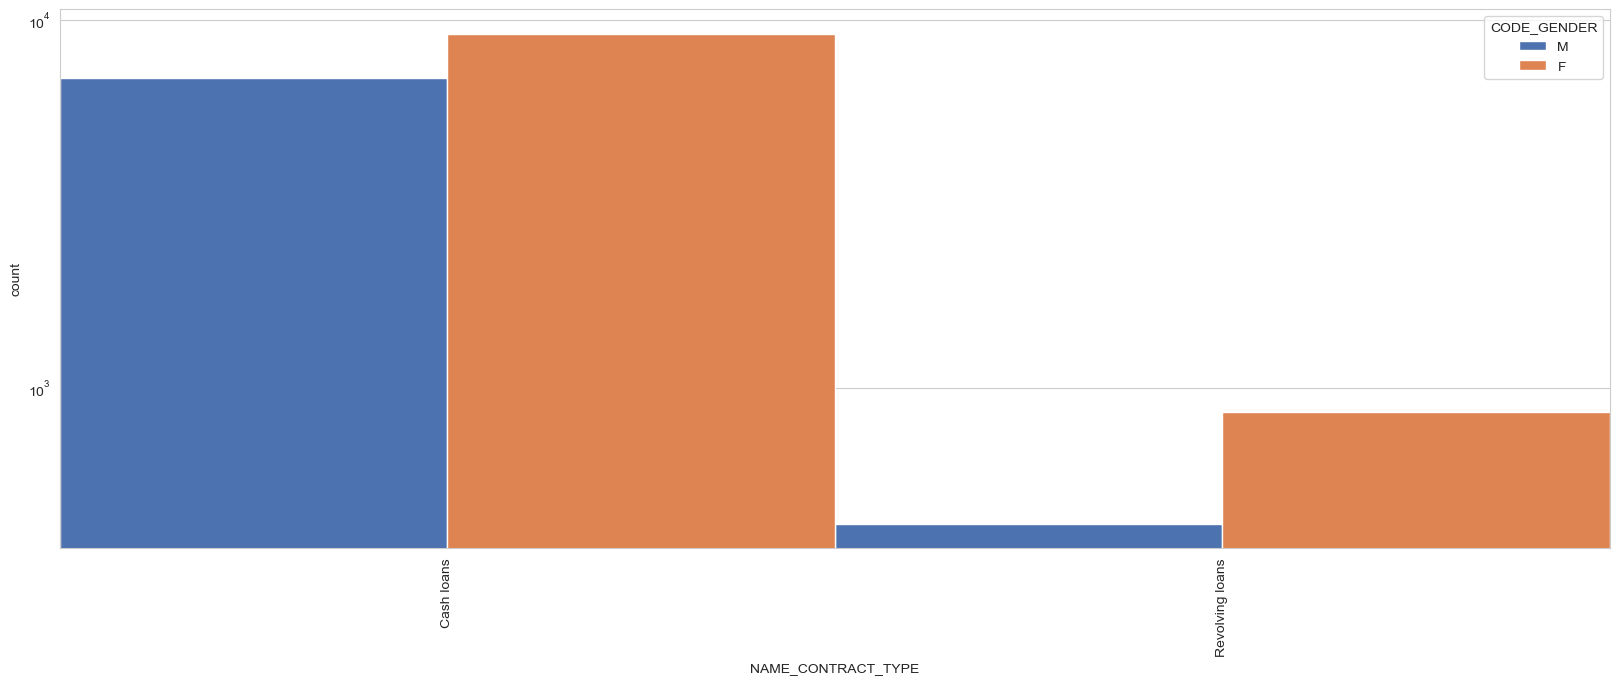

In [91]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.countplot(data=df1,x='NAME_CONTRACT_TYPE',width=1,palette='deep',hue='CODE_GENDER',saturation=1,order=df['NAME_CONTRACT_TYPE'].value_counts().index)
plt.xticks(rotation=90)
fig.set_size_inches(20 ,7)
plt.yscale('log')
plt.show()

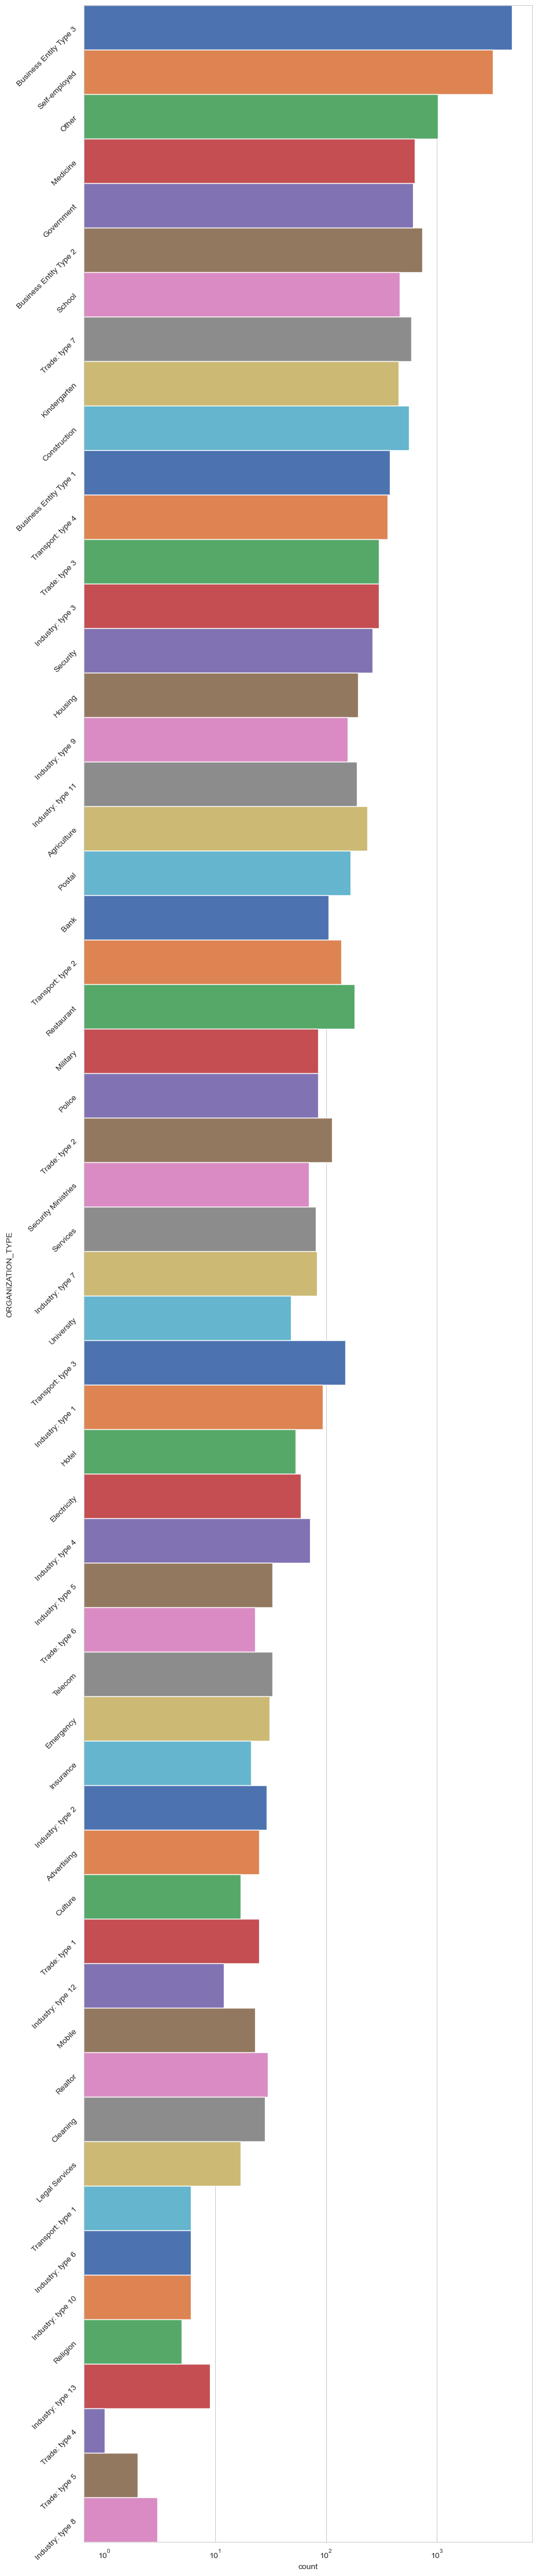

In [93]:
fig, ax = plt.subplots()
sns.set_style('whitegrid')
sns.countplot(data=df1,y='ORGANIZATION_TYPE',width=1,palette='deep',saturation=1,order=df['ORGANIZATION_TYPE'].value_counts().index)
fig.set_size_inches(10,len(df['ORGANIZATION_TYPE'].unique()))
plt.yticks(rotation=45)
plt.xscale('log')
plt.show()

### Box Plotting For Credit Amount

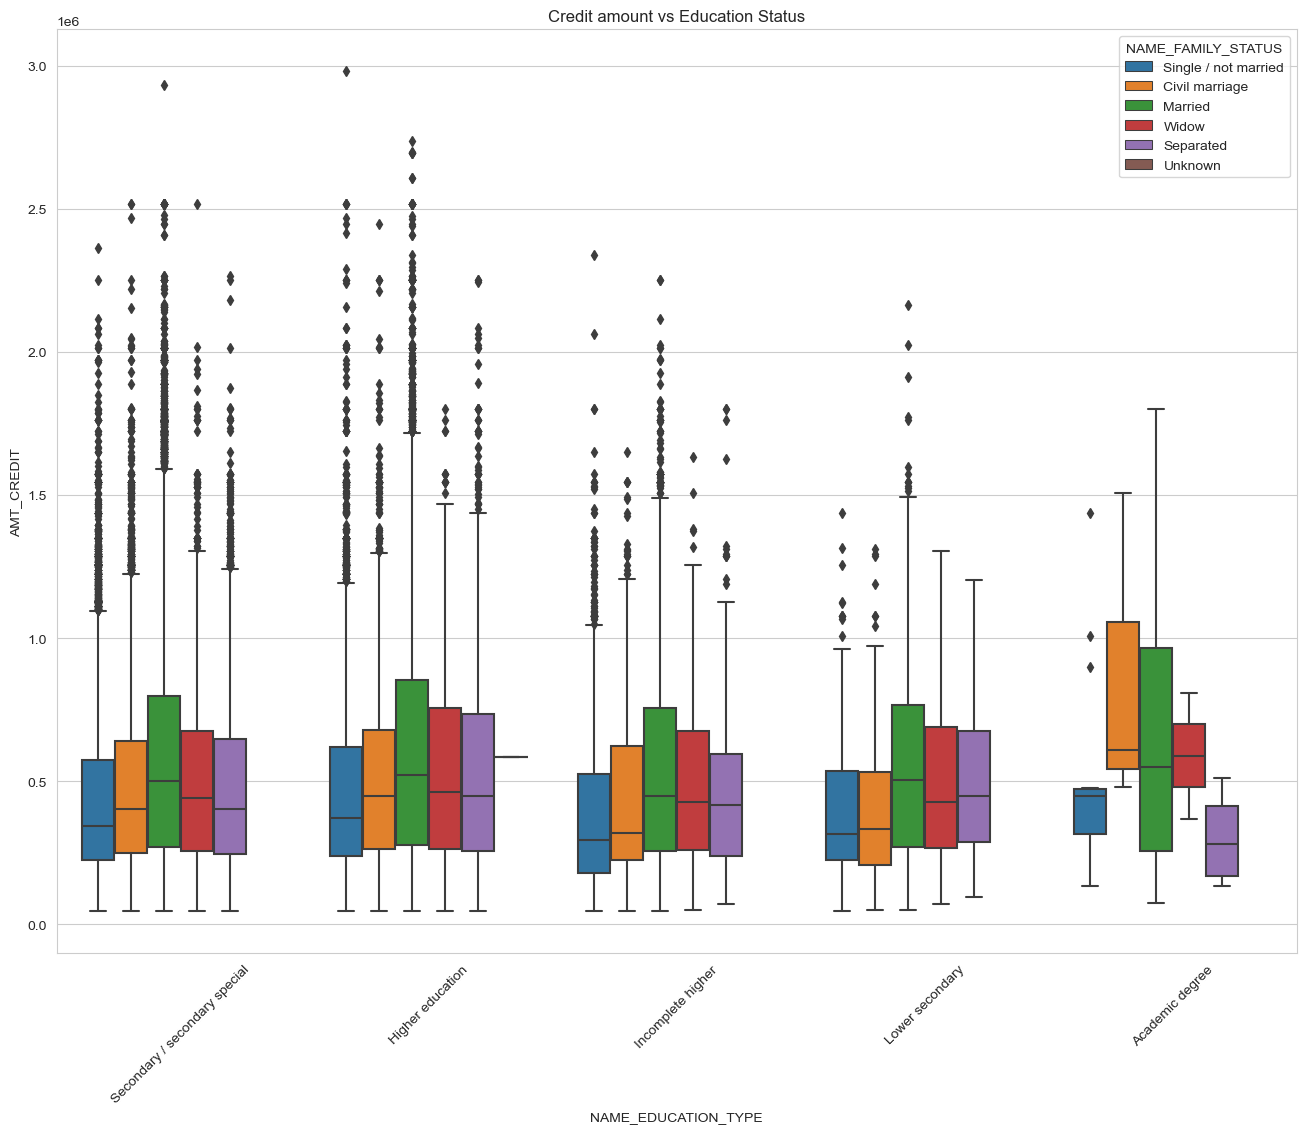

In [95]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

### Box Plotting For Income Amount 

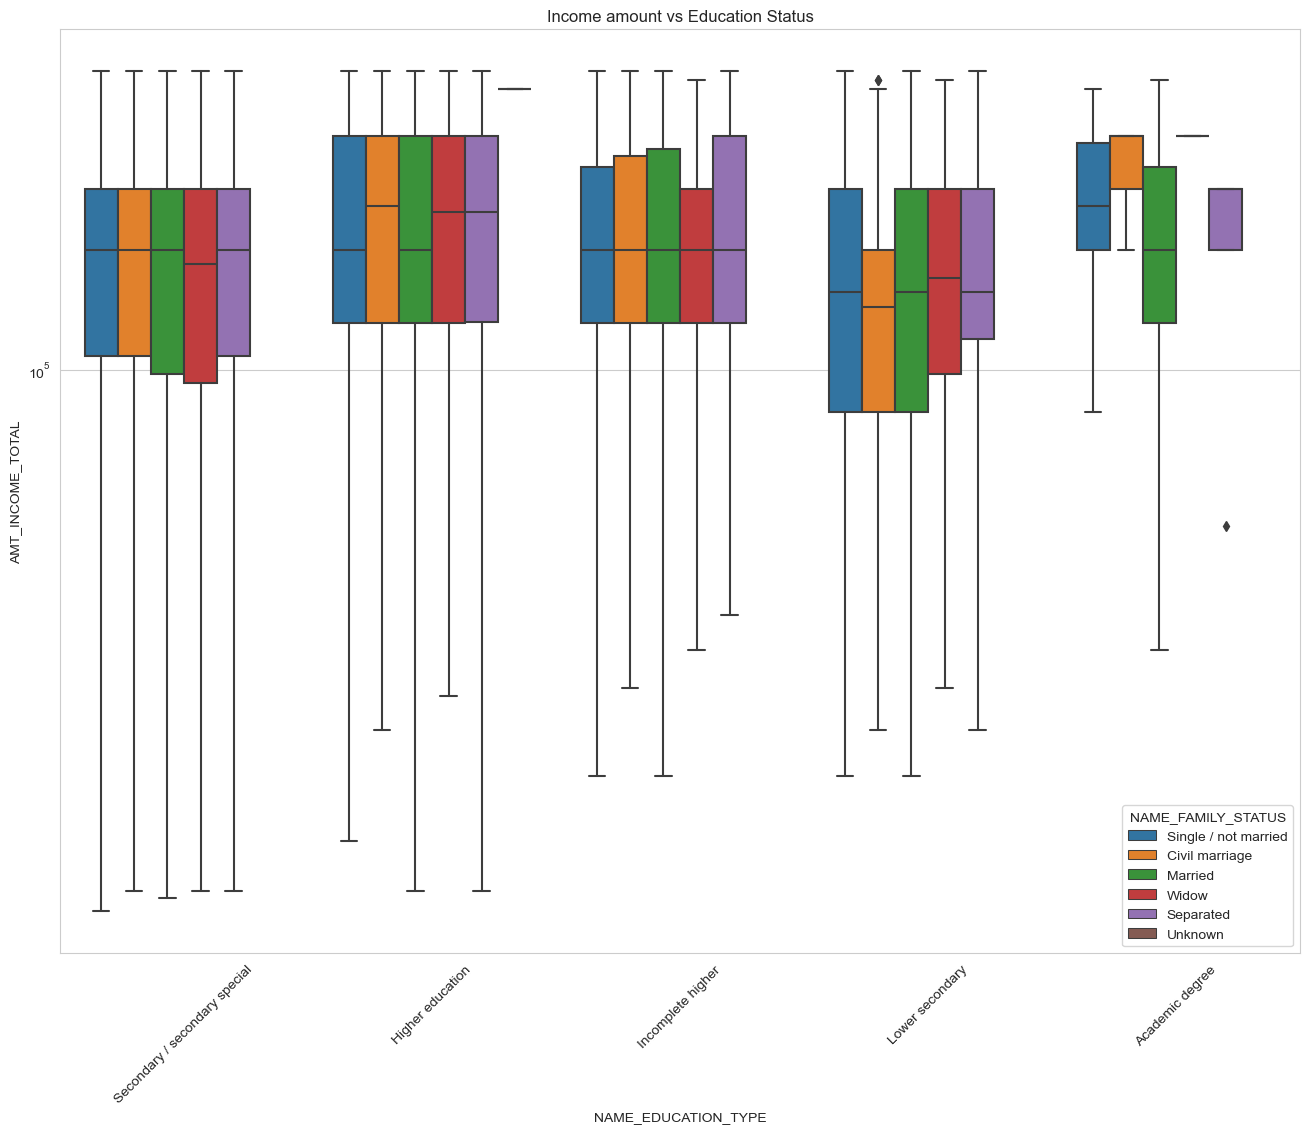

In [97]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()